In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [39]:
dataset_dir = 'data/caltech-101-img'

In [40]:
dataset_datagen = ImageDataGenerator(rescale=1.0 / 255,)

In [41]:
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
dataset_dir,
target_size=(64, 64),
batch_size=batch_size,
class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [42]:
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]

In [43]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

2000
2000
2000
2000


In [44]:
import os
# weights_path = 'data/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
weights_path = 'data/vgg/vgg16_weights_tf_dim_ordering_tf_kernels_notop (1).h5'
print(os.path.exists(weights_path))

True


In [45]:
weights_path = 'data/vgg/vgg16_weights_tf_dim_ordering_tf_kernels_notop (1).h5'
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [46]:
for layer in base_model.layers:
    layer.trainable = False

In [47]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

In [48]:
model = Model(inputs=base_model.input, outputs=predictions)

In [49]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 899ms/step - accuracy: 0.1730 - loss: 4.0752 - val_accuracy: 0.2810 - val_loss: 3.4852
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3320 - loss: 3.1296 - val_accuracy: 0.3800 - val_loss: 2.9847
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4435 - loss: 2.6089 - val_accuracy: 0.4385 - val_loss: 2.6534
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5325 - loss: 2.2018 - val_accuracy: 0.4750 - val_loss: 2.4084
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5840 - loss: 1.8990 - val_accuracy: 0.4970 - val_loss: 2.2671
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6390 - loss: 1.6595 - val_accuracy: 0.5325 - val_loss: 2.1241
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6840 - loss: 1.4595 - val_accuracy: 0.5375 - val_loss: 2.0336
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7190 - loss: 1.2951 - val_accuracy: 0.5420 - val_lo

In [51]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [52]:
for layer in base_model.layers:
    layer.trainable = False

In [53]:
for layer in base_model.layers[len(base_model.layers) - 2:]:
    layer.trainable = True

In [54]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

In [55]:
model = Model(inputs=base_model.input, outputs=predictions)

In [56]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.3360 - loss: 3.2211 - val_accuracy: 0.4790 - val_loss: 2.4054
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5645 - loss: 1.8576 - val_accuracy: 0.5430 - val_loss: 1.9063
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6900 - loss: 1.2182 - val_accuracy: 0.5935 - val_loss: 1.7696
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7770 - loss: 0.8450 - val_accuracy: 0.5945 - val_loss: 1.7179
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8525 - loss: 0.5120 - val_accuracy: 0.6210 - val_loss: 1.7071
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9240 - loss: 0.3073 - val_accuracy: 0.6180 - val_loss: 1.7806
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9500 - loss: 0.2037 - val_accuracy: 0.6120 - val_loss: 1.8200
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9695 - loss: 0.1287 - val_accuracy: 0.6345 - val_loss:

In [58]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step


In [59]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  joshua_tree
Actual:  joshua_tree


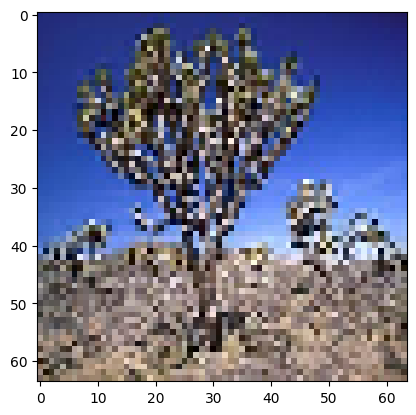

In [60]:
plt.imshow(x_test[60])
print("Preditcted: ",labels[np.argmax(predicted_value[60])])
print("Actual: ", labels[np.argmax(y_test[60])])

In [61]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy is {acc * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - accuracy: 0.6315 - loss: 1.8996
Accuracy is 63.15%
